<a href="https://colab.research.google.com/github/jaylynnromero/bootcamp/blob/main/assignments/biol300_hw7_group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# another module for opening images
import gdal
import glob
import numpy as np
# module for ploting or displaying images
import matplotlib.pyplot as plt
import skimage.filters
import skimage.io
import skimage.morphology
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Problem 1 (30 points)

At the end of the individual portion, you should have had a list of all the image file names for the jellyfish during the day. 

A. Now loop through those images, extract out the box for the third jellyfish, and save the total intensity of the box at each frame.



In [ ]:

jellyfish_list = glob.glob("/content/drive/MyDrive/BIOL300_S22/data/jellyfish_day_10sec/Frame_*.TIF")

intensity_list = []
jellyfish_img_list = np.sort(jellyfish_list)
count = 0
for image in jellyfish_img_list:
  im = gdal.Open(image).ReadAsArray()
  im_box = im[80:236,348:497]
  im_box_thresh = (im_box < 10)
  intensity_list.append(np.sum(im_box_thresh))
print(intensity_list)

  

[3522, 3618, 3724, 3761, 3777, 3848, 3845, 3860, 3725, 3576, 3422, 3331, 3375, 3436, 3557, 3680, 3726, 3770, 3797, 3710, 3559, 3388, 3354, 3391, 3439, 3601, 3717, 3785, 3857, 3877, 3947, 3890, 3741, 3456, 3411, 3413, 3449, 3581, 3695, 3785, 3831, 3880, 3920, 3811, 3674, 3447, 3385, 3374, 3408, 3534, 3634, 3703, 3772, 3806, 3852, 3755, 3528, 3371, 3342, 3337, 3435, 3550, 3652, 3714, 3802, 3820, 3852, 3918, 3917, 3764, 3606, 3438, 3434, 3450, 3542, 3646, 3795, 3817, 3901, 3902, 3962, 3980, 3878, 3740, 3564, 3449, 3436, 3453, 3569, 3685, 3776, 3836, 3857, 3895, 3928, 3927, 3783, 3578, 3462, 3362, 3378, 3438, 3584, 3650, 3681, 3765, 3812, 3823, 3834, 3719, 3532, 3421, 3389, 3396, 3501, 3608, 3717, 3783, 3844, 3904, 3940, 3968, 3941, 3842, 3684, 3511, 3430, 3453, 3502, 3639, 3756, 3801, 3848, 3901, 3930, 4014, 3977, 3898, 3778, 3566, 3461, 3439, 3441]


B. Plot these intensities over time. To set the x-axis you'll need to use the fact that there were 15 frames per second. How many pulses do you see during these 10 seconds?

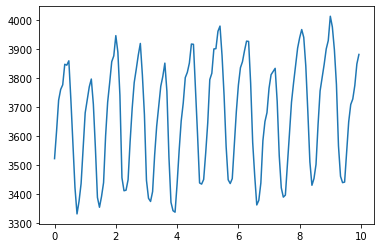

In [ ]:
x_axis = []
ticks = 0
for i in range(len(intensity_list)):
  x_axis.append(ticks)
  ticks += 1/15
plt.plot(x_axis, intensity_list)
plt.show()

# approximately 11 pulse cycles


C. Repeat the analysis for this same jellyfish, but for the images taken at night. How many times does the jellyfish pulse at night?

In [ ]:

jellyfish_list = jellyfish_list = glob.glob("/content/drive/MyDrive/BIOL300_S22/data/jellyfish_night_10sec/Frame_*.TIF")

intensity_list = []
jellyfish_img_list = np.sort(jellyfish_list)
count = 0
for image in jellyfish_img_list:
  im = gdal.Open(image).ReadAsArray()
  im_box = im[80:236,348:497]
  im_box_thresh = (im_box < 10)
  intensity_list.append(np.sum(im_box_thresh))
print(intensity_list)


[1953, 1909, 1940, 1935, 1998, 2133, 2187, 2186, 2228, 2216, 2157, 2109, 2064, 1967, 1904, 1904, 1955, 1996, 2085, 2152, 2173, 2189, 2177, 2198, 2148, 2077, 2038, 1933, 1904, 1918, 1975, 2057, 2127, 2172, 2174, 2199, 2189, 2187, 2166, 2019, 1975, 1902, 1895, 1897, 2014, 2119, 2123, 2164, 2185, 2209, 2154, 2187, 2160, 1992, 1964, 1928, 1941, 1964, 2078, 2159, 2171, 2180, 2182, 2178, 2115, 2154, 2197, 1999, 1948, 1934, 1949, 1948, 2078, 2200, 2194, 2214, 2234, 2215, 2152, 2172, 2183, 2126, 2069, 1985, 1927, 1890, 1977, 2054, 2151, 2193, 2192, 2204, 2172, 2227, 2223, 2169, 2191, 2166, 2020, 1928, 1945, 1935, 2029, 2048, 2213, 2170, 2168, 2199, 2208, 2161, 2134, 2140, 2033, 1910, 1925, 1949, 2010, 2045, 2182, 2208, 2210, 2270, 2211, 2172, 2124, 2179, 2051, 1967, 1945, 1940, 2007, 2043, 2126, 2211, 2222, 2198, 2196, 2202, 2183, 2213, 2199, 2140, 2042, 1987, 1972, 1930, 2030, 2100, 2188, 2204]


D. What differences do you notice in the jellyfish between night and day?

The jellyfish pusles are longer during the night or faster during the day

It turns out that these single 10-second clips don't make the differences between the night and day particular clear. Now that you have a sense of how these data were analyzed, let's take a look at the values for a much longer time frame, without messing with the images themselves. Below is the dataframe of values for 250+ seconds of images (as analyzed by yours truly!).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/BIOL300_S22/data/jellyfish_values.csv")
df.head()

,time (s),day,night
0,0.000000,4.073090,9.195357
1,0.066667,3.925700,9.073050
2,0.133333,3.785661,9.073950
3,0.200000,3.715860,9.099444
4,0.266667,3.666644,9.229641


E. Now plot these values for the jellyfish over time for day and night. Note: it's probably best to make two separate plots, as night and day have their own scales of values (due to the ambient lighting in the room), making them hard to compare on a single plot.

In [ ]:
#pulled values from the csv file using location of data frames to plot graph

time = list(df.iloc[:, 0])
day = list(df.iloc[:, 1])
plt.plot(time,day, color='red')
plt.xlabel("Time in seconds")
plt.ylabel("Jellyfish Pulse duration - day ")
plt.show()

night = list(df.iloc[:, 2])
plt.plot(time,night, color='black')
plt.xlabel("Time in seconds")
plt.ylabel("Jellyfish Pulse duration - night ")
plt.show()

NameError: ignored

F. Now looking over this longer time frame, what differences do you see between night and day? What do you think lead the author to conclude that jellyfish exhibit a "sleep-like state"?

The graphs illustrate not only longer pulse times, but a much greater pause between pulses.

# Problem 2 (40 points)

This problem is a continuation of the second problem from the previous homework. It turns out the researchers actually tested a whole range of repressor copy numbers (not just delta and R124), as they had predictions of how the gene expression (as measured by YFP) changed with increasing number of repressors. Make sure to grab the full data set from the HW7 OneDrive folder, as we now have more images to work with.

In cases like this, where we want to repeat the same analysis on many images, it is helpful to put your entire image analysis pipeline into a function that can be called repeatedly.

A. Write a function that takes in the path to an mCherry image and corresponding YFP image, and returns a list of the YFP intensities of each bacteria in the images. This basically distills everything you did last homework into a single function.



In [ ]:
#specify path for bacteria data
bac_path = "/content/drive/MyDrive/BIOL300_S22/data/HW6.zip (Unzipped Files)"
path_mCherry = '/content/drive/MyDrive/BIOL300_S22/data/HW6.zip (Unzipped Files)/HW6/laci_images/deltaLacI_experiment_001_mCherry.tif'
path_YFP = '/content/drive/MyDrive/BIOL300_S22/data/HW6.zip (Unzipped Files)/HW6/laci_images/deltaLacI_experiment_001_YFP.tif'

In [ ]:
def average_YFP_values(path_mCherry, path_YFP):
  #specify paths
 
  # load images
  im_mCherry = skimage.io.imread(path_mCherry)
  im_YFP = skimage.io.imread(path_YFP)

  # Threshold value, as obtained by eye
  thresh_mCherry = 1500

  # Generate thresholded image
  im_mCherry_bw = im_mCherry > thresh_mCherry
    #initial setup


  # Make the structuring element
  selem = skimage.morphology.square(3)

  # Perform the median filter
  labeled = skimage.measure.label(im_mCherry_bw)
  
  bacteria_count = labeled.max()
  print("Total Bacteria Count =", bacteria_count)

  list_intensity = []
  for i in range(1,bacteria_count+1):
    bacteria = labeled==i
    overlay_1 = bacteria * im_YFP
    area_1 = bacteria.sum()
    YFP_total = overlay_1.sum()
    average_YFP_intensity = round(YFP_total/area_1, 3)
    list_intensity.append(average_YFP_intensity)

  return list_intensity


B. Demonstrate that your function works by testing it on the delta LacI strain we investigated last week. It should return the same results as you saw for question 2C last week. 

In [ ]:
path_mCherry = "/content/drive/MyDrive/BIOL300_S22/data/lacI_images/deltaLacI_experiment_001_mCherry.tif"
path_YFP = "/content/drive/MyDrive/BIOL300_S22/data/lacI_images/deltaLacI_experiment_001_YFP.tif"

average_YFP_values(path_mCherry, path_YFP)

C. With this, we are ready to apply your function to all the images. 
Use `glob.glob` to get all the mCherry images and YFP images, saving each as their own lists. Make sure to sort both lists so the correct images correspond with each other!

In [ ]:
# 
YFP_paths = glob.glob('/*/*/*/*/*/*/*/laci_images/deltaLacI_experiment_001_YFP.tif')

YFP_paths_sorted = np.sort(YFP_paths)


D. Now call your function on each pair of mCherry/YFP images, saving each list of YFP values.

In [ ]:
# still needs to be tested


YFP_list = []
for i in YFP_paths_sorted:
  YFP_list.append(average_YFP_values(YFP_paths_sorted[i]))

E. Consolidate your results either into a dataframe, or into two lists (one of x-values and one of y-values). With this, plot a scatter plot of YFP intensity vs. repressor copy number (where DeltaLacI is 0 repressors, R22 is 22 repressors, etc.). 